<div class="alert alert-block alert-info">

<b>Thank you for contributing to TeachOpenCADD!</b>

</div>

<div class="alert alert-block alert-info">

<b>Set up your PR</b>: Please check out our <a href="https://github.com/volkamerlab/teachopencadd/issues/41">issue</a> on how to set up a PR for new talktorials, including standard checks and TODOs.

</div>

# T05 . Transformer based Molecular Property prediction

Authors:

- Kalanika Elamaldeniya, 22/05/2023,Volkamer Lab, Saarland University


### Aim of this talktorial

In this tutorial, we will first introduce the fundamental concepts of transformer-based models and their application in predicting molecular properties using the ESOL dataset. We will guide you through the process of implementing a transformer model using PyTorch and showcasing how to train and evaluate it effectively to predict the solubility of small molecules.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* Transformer Model
* What Can Transformer Model do
* Transformers Replace RNN and CNN
* Transformer Architecture
  * self attention mechanism
  * Multi -head Attention
  * Feed Forward Netwrok
  * Positional Encoding
  
* Property Prediction
* Input Representation
* Output and Training
* Transformer advantages over traditional models in capturing contextual information
* Applications of Transformer-Based Property Prediction:


  





### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Embedding
* Positional Encoding
* Creating the mask
* multihead attention
* Calculating Attention
* The feed forward network
* Normalization
* Training the model
* Testing the model



### References

* Paper
* Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A.N., Kaiser, L., & Polosukhin, I. (2017). "Attention is All You Need." Advances in Neural Information Processing Systems (NeurIPS), 30, 5998-6008. Retrieved from https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

* Chandra A, Tünnermann L, Löfstedt T, Gratz R. "Transformer-based deep learning for predicting protein properties in the life sciences." Elife. 2023 Jan 18;12:e82819. doi: 10.7554/eLife.82819. PMID: 36651724; PMCID: PMC9848389.

 * Lyu Lin" Transformer-based Model for Molecular Property Prediction with Self-Supervised Transfer Learning "

 
* Tutorial links

 https://www.youtube.com/watch?v=4Bdc55j80l8&t=325s
 
 https://www.youtube.com/watch?v=kqMD501VzdI&t=454s
 
 https://pytorch.org/tutorials/beginner/transformer_tutorial.html
 
* Blog 

  https://machinelearningmastery.com/the-transformer-model/
  
  https://blogs.nvidia.com/blog/2022/03/25/what-is-a-transformer-model/
  
  https://towardsdatascience.com/attention-is-all-you-need-e498378552f9
  
 

## Theory

### Transformer model

 Transformers are a type of deep learning model that has gained significant attention for its ability to capture complex patterns and relationships in sequential data. which was introduced in the 2017 "Attention is all you need "paper. However now we are using Transformers every time when we are using Google. It can detect trends and anomalies to prevent fraud, streamline manufacturing, make online recommendations, or improve healthcare. It uses a set of mathematical techniques called self-attention which will describe more later. 
.


###  What Can Transformer Model do

Transformers were originally introduced for natural language processing tasks. However, its effectiveness extends beyond language tasks and has been successfully applied to various domains, including property prediction tasks in chemistry and drug discovery.
They’re helping researchers understand the chains of genes in DNA and amino acids in proteins in ways that can speed drug design.





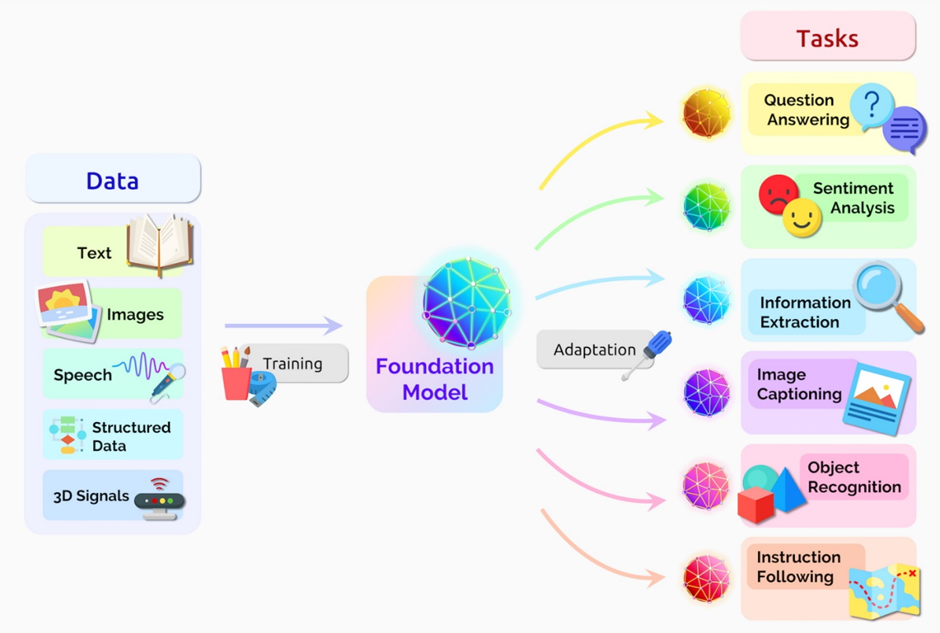
*Figure 1:* 
Transformer Model.
Figure and description taken from: [<i>Nvidia.</i> (2022),](https://blogs.nvidia.com/blog/2022/03/25/what-is-a-transformer-model/).

 In this theory, we will explore the key concepts and techniques involved in using Transformer models for property prediction.
 
 Researchers from the Rostlab at the Technical University of Munich, known for their contributions at the intersection of AI and biology, made significant advancements in protein understanding using natural language processing techniques. Over a span of 18 months, they transitioned from using recurrent neural networks (RNNs) with 90 million parameters to larger transformer models with 567 million parameters. This shift to larger transformers proved beneficial, allowing them to achieve improved performance and enhanced capabilities in analyzing and deciphering complex protein structures and functions.
 
 


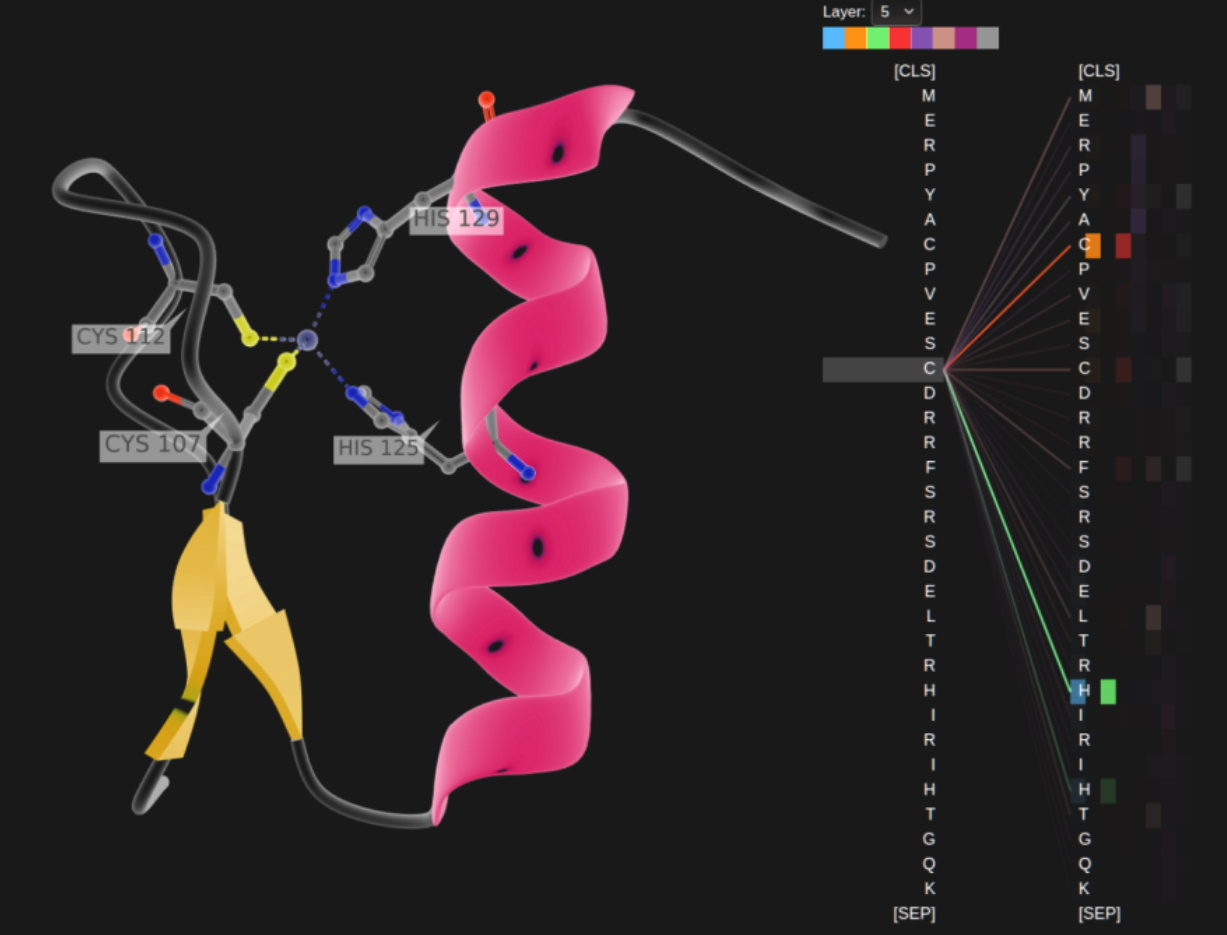

### Transformers Replace CNN and RNN

Transformers are neural networks more popular in this era, compared to RNN and CNN 5 years ago. Transformers are the most powerful tool in property prediction and NLP in various domains such as chemistry, Bioinformatics, and Drug discovery because of their ability to capture long-range dependencies in a sequence efficiently, making them better at understanding the broader context. In Contrast to the Transformer model, RNN processes sequences sequentially and may struggle with capturing long-range dependencies. Also, the Transformer model shows promising results in Computer vision tasks. Vision Transformers (ViTs) divide images into patches and process them using the Transformer architecture. Although they don't use traditional convolutional operations like convolutional neural networks (CNNs), ViTs have achieved competitive performance in image classification.


### Transformer Architecture:

The Transformer are basically large encoder/decoder blocks that process data and it consists of self-attention and feed-forward neural network layers. Unlike traditional recurrent neural networks (RNNs) or convolutional neural networks (CNNs), Transformers do not rely on sequential processing or explicit convolutional operations. Instead, they have implemented self-attention mechanisms to capture relationships between different elements in the input.

Transformers use positional encoders to tag data elements coming in and out of the network. Attention units follow these tags, calculating a kind of algebraic map of how each element relates to the others


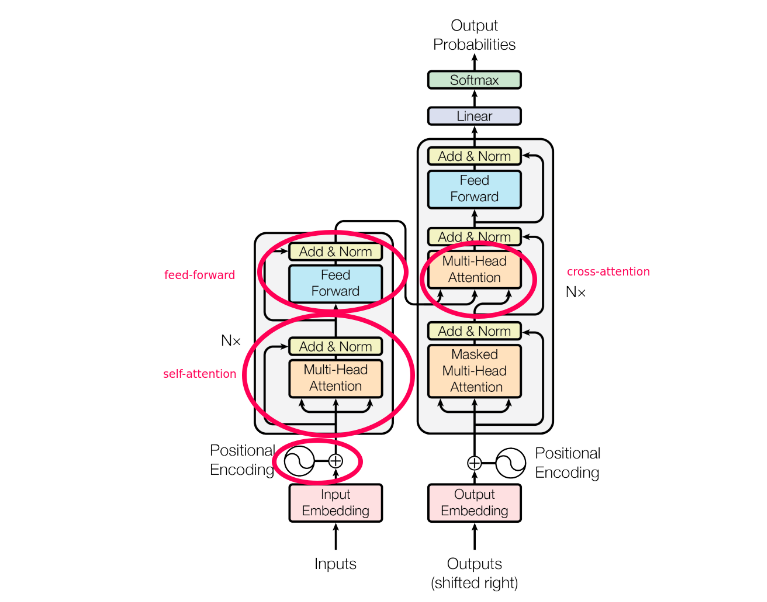
*Figure 2:* 
Transformer Model.
Figure and description taken from: [<i>MachineLearningmastery</i>](https://machinelearningmastery.com/the-transformer-model/).





As you can see in  **Figure 2** For encoders, each encoder receives input X =
(x1, ..., xn) and computes multi-head attention. Each head is called a ”Scaled Dot product attention". First, with matrix operations, query matrix Q, together with key
matrix K and value matrix V are generated. Then, we compute the attention function
as:
$$\text{Attention}(Q, K, V ) = \text{softmax} (\frac{QK^T}{\sqrt{d_k}})V$$.


### Self-Attention Mechanism:

Self-attention is a crucial component in Transformer model architecture. At NLP system It enables the Transformer to weigh the importance of different words (or tokens) in a sequence when encoding information. It allows the model to capture relationships between words, regardless of their positions in the sequence. The self-attention mechanism can be broken down into three main steps: computing attention scores, applying softmax, and obtaining weighted representations.

In the context of property prediction, self-attention enables the model to learn how different atoms in a molecule interact and contribute to its properties. The self-attention mechanism computes attention weights for each element based on its similarity to other elements and uses these weights to aggregate information from relevant elements.
Self-attention finds meaning, for example,

  _She added water from the pitcher into the cup until <span style="color:red">it</span>  was full._ 

We know <span style="color:red">“it”</span> refers to the cup, while in the sentence:

  _She poured water from the pitcher to the cup until <span style="color:red">it</span> was empty._

We know <span style="color:red">“it”</span> refers to the pitcher.  
 [1]

Ashish Vaswani, a former senior staff research scientist at Google Brain who led work on the seminal 2017(“Attention is all you need “) paper said, “Machine translation was a good vehicle to validate self-attention because you needed short- and long-distance relationships among words,” Now we see self-attention is a powerful, flexible tool for learning,” he added.


###### Applying Softmax:

After computing the attention scores, we apply the softmax function to obtain attention weights that sum up to 1. The softmax function ensures that each word's attention weight represents its relative importance within the context of the sentence.

###### Weighted Representations:

Finally, we multiply the attention weights with the value vectors for each word to obtain the weighted representations. The weighted representations are then summed up to create the final representation for each word.

### Multi-Head Attention:
To enhance the representation power and capture diverse relationships, the self-attention mechanism is usually employed in multiple parallel heads. Each attention head attends to different subsets of the input sequence and produces separate sets of attention weights and aggregated representations. The outputs of the attention heads are then concatenated and linearly transformed to generate the final output of the self-attention layer.

Instead of simple attention function the multi-head attention simply uses h different sets of query,key and value matrices.

 multi-head attention linearly project the
queries, keys and values h times with different linear projections to dk, dk and dv
dimensions. Finally, the h attention heads are projected to dmodel dimensions. The
result of the multi-head attention is:

 __MultiHead(Q, K, V) = Concat(head_i, ..., head_h) * W_O,    (2.2)__\
 __head_i = Attention(Q * W_Q_i, K * W_K_i, V * W_V_i),    (2.3)__

Where the projections are weight matrices:

W_Q_i ∈ ℝ^(d_model x d_k)
W_K_i ∈ ℝ^(d_model x d_k)
W_V_i ∈ ℝ^(d_model x d_v)
W_O ∈ ℝ^(h x d_v x d_model)




### Feed-Forward Networks:
After the self-attention layer, Transformer models typically employ feed-forward neural networks (FFNs) to process the aggregated representations. FFNs consist of fully connected layers with non-linear activation functions, enabling the model to capture complex relationships and patterns in the learned representations. The FFN layers provide additional transformations and non-linearities to refine the learned features before the final prediction.

### Positional Encoding

In languages  the order of the words and their position in a sentence really important.It makes the sentence meaningful. recurrent neural networks have an inbuilt mechanism that deals with the order of sequences. Instead of using that inbuilt mechanism Transformer model, is using positional encoding to introduce positional information into the input embeddings. It allows the model to understand the sequential order of elements in the input sequence. 

 positional information represent the position or location of each element in a sequence. Instead of using simple index values, a more sophisticated approach is used.

The reason for not using a single number like the index value is that it can become problematic for long sequences. Index values can grow large, and normalizing them between 0 and 1 may lead to inconsistent normalization for variable-length sequences.

To address this, transformers employ a clever positional encoding scheme. Each position or index in the sequence is mapped to a unique vector. The positional encoding layer outputs a matrix where each row represents an encoded object in the sequence combined with its positional information.

This approach allows the model to incorporate positional knowledge while avoiding the issues associated with using simple index values. The positional encoding matrix provides a comprehensive representation that combines the elements of the sequence with their respective positional information.An example of matrix with positional information is shown in the <span style="color:blue">Figure 3</span>  below. 

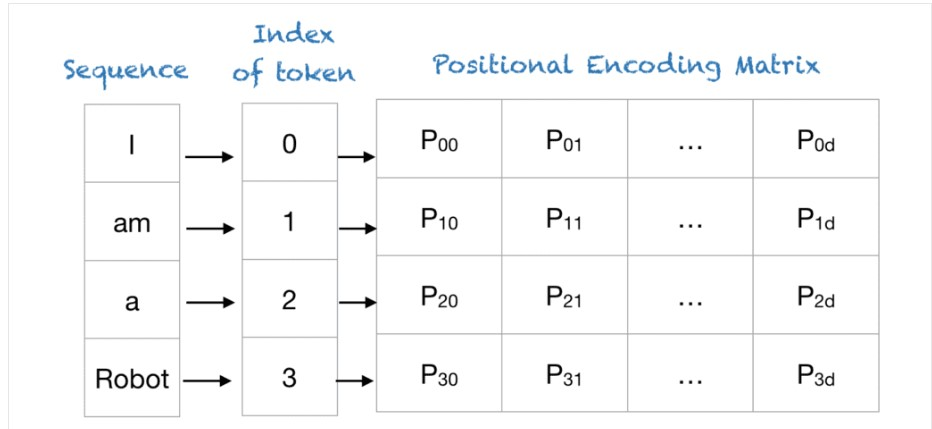
*Figure 3:* 
Positional Encoding Matrix for the sequence ´I am a Robot`.
Figure and description taken from: [<i>MachineLearningmastery</i>](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/).

The positional encoding is given by sine and cosine functions of varying frequencies: Here Assuming we have an input sequence of length L and require the position of the k^{th} object within this sequence.

\begin{eqnarray}
P(k, 2i) &=& \sin\Big(\frac{k}{n^{2i/d}}\Big) \
P(k, 2i+1) &=& \cos\Big(\frac{k}{n^{2i/d}}\Big)
\end{eqnarray}


In predicting molecular properties also the order or position of elements in the input sequence can play a crucial role in determining the desired property.Without positional encoding, the model might treat the input sequence as a collection of unordered elements, ignoring the valuable information contained in the sequence order. By including positional encoding, the model gains the ability to capture the structure and dependencies within the sequence, leading to improved predictions 


### Property Prediction
Property prediction should be more accurate and efficient when it comes to most of the Drug design, and discovery things.
 In this talktorial, we are considering the solubility prediction of small molecules.
Solubility prediction is a critical aspect of various scientific disciplines, including pharmaceutical drug discovery, etc. Predicting the solubility of small molecules is essential for designing effective drug formulations, predicting their environmental fate, and optimizing chemical processes. The solubility prediction task involves mapping a molecular structure to its corresponding solubility value, which is a regression problem.
So here we are using a transformer-based method to predict the solubility of small molecules. However, there are some traditional empirical methods for solubility prediction, such as rule-based approaches and quantitative structure-activity relationship (QSAR) models. But they often have limitations,
Rule-based approaches rely on predefined rules or heuristics to predict solubility. These rules are often based on expert knowledge or chemical intuition. However, these approaches may oversimplify the relationship between molecular structures and solubility, leading to limited accuracy.
 
Quantitative Structure-Activity Relationship (QSAR) Models:
QSAR models using statistical and machine learning techniques to establish quantitative relationships between molecular descriptors and solubility. But these models also have limitations due to their reliance on preselected descriptors and assumptions about linearity.
For example, one limitation is Descriptor Selection Bias: choice descriptors are subjective and may not identify all the important features that need for solubility prediction.
In contrast, Transformer-based models offer advantages in capturing the complex relationships between molecular structures and solubility.  
By use of the Self-attention mechanism and the ability to learn from large amounts of data, these models can discover intricate patterns, nonlinearity, and long-range dependencies in molecular structures, resulting in improved solubility predictions across diverse chemical space.



### Input Representation:

As an example ,

Here the english text is the raw data, but As any other models ,transformer model does not underastand the text in english.So as in the **Figure 2** every word in text convert to unique numeric ID.This is accomplished by using a specific dictionary of vocabulary, which can be generated from the training data and is utilized to map each word to a numeric index.

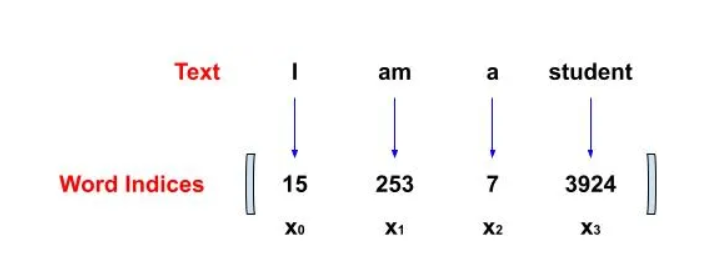

*Figure 3:* 
Numerical Representation of the Raw Text. Figure and description taken from: [<i>Towards data science.</i> (2022)](https://towardsdatascience.com/attention-is-all-you-need-e498378552f9/).



In the Property prediction context, there are several ways to represent molecules which are explained and discussed in **Talktorial T033**, the input representation involves encoding the molecular structure and features. One common approach is to represent molecules as graphs, where atoms are nodes and bonds are edges. Each atom and bond can have associated features, such as atomic number, chirality, and bond type. Using learnable embedding layers these features are embedded into a continuous vector representation. 

SMILES (Simplified Molecular Input Line Entry System) is a textual representation of molecules that encodes their structure. It is a widely used representation in cheminformatics and can be directly fed into the model as a sequence of characters or tokens. SO in this tutorial we have tokenize the SMILES string and convert it to numerical indices to be used as input for the model.

### Output and Training:

The output of a Transformer model for property prediction can be a graph-level prediction or node-level prediction, depending on the task. For graph-level tasks, such as predicting molecular properties, a global pooling operation can be applied to obtain a fixed-size representation of the molecule from the node-level representations. This global representation is then fed into a fully connected layer to make the final prediction. Node-level predictions can be made by applying a separate classifier to each node representation.

Training a Transformer model for property prediction involves optimizing the model's parameters using a suitable loss function. Common loss functions for regression tasks include mean squared error (MSE) or mean absolute error (MAE), while classification tasks often use cross-entropy loss. The model is trained using backpropagation and gradient-based optimization algorithms, such as stochastic gradient descent (SGD) or Adam, to minimize the loss function.


### Transformer advantages over traditional models in capturing contextual information

Compared to traditional recurrent or convolutional neural networks, transformers can capture long-range dependencies efficiently. And it mainly relies on self-attention mechanisms to process input data. The attention mechanism allows transformers to assign varying weights to different parts of the input sequence, enabling them to focus on the most relevant information.

So, in the solubility prediction task, transformers excel at capturing the intricate relationships between molecular features and solubility. By considering the entire molecular structure simultaneously, transformers can effectively capture the complex interactions between atoms, functional groups, and other molecular descriptors that contribute to solubility. This holistic view of the molecule allows transformers to capture crucial contexts and dependencies that traditional models might overlook.


### Applications of Transformer-Based Property Prediction:
Transformer models have demonstrated promising results in various property prediction tasks related to molecules and chemicals. Some applications include:

1. Molecular Property Prediction: Transformers can be used to predict various molecular properties, such as toxicity, solubility, bioactivity,or drug-likeness. By learning from large-scale chemical databases, Transformer models can capture complex structure-property relationships and assist in drug discovery and material design.

2. Generative Models for Molecule Design: Transformers can be employed in generative models for de novo molecule design. By leveraging the learned representations and attention mechanisms, these models can generate novel molecules with desired properties or optimize existing molecules.

3. Protein Structure and Function Prediction: Transformers have also been applied to predict protein properties and functions. By representing protein sequences or structures as input sequences, Transformers can learn meaningful representations that aid in tasks such as protein structure prediction, protein-ligand binding affinity prediction, or protein function annotation.

4. Drug-Target Interaction Prediction: Transformer models can be utilized to predict the interactions between drugs and their target proteins. By encoding drug and protein features and capturing their relationships, these models enable the identification of potential drug-target interactions, supporting drug repurposing and personalized medicine.**mention some examples**

In summary, Transformer models have emerged as powerful tools for property prediction tasks in various domains, including chemistry, drug discovery, and bioinformatics. By leveraging self-attention mechanisms and neural network layers, these models can capture complex relationships in structured data and provide accurate predictions for graph-based tasks.

## Practical

This code implements a solubility prediction model using a Transformer-based architecture in PyTorch. The model takes molecular structures represented as Simplified Molecular Input Line Entry System (SMILES) strings as input. It preprocesses the dataset, creating a custom dataset class and DataLoader to efficiently handle the data. The model includes components like embedding, positional encoding, multi-head self-attention, feed-forward layers, and layer normalization

In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd


In [14]:
# Embedding

class Embedder(nn.Module):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
        
    def forward(self, x):
        return self.embed(x)



In [ ]:
# Postional Encoding

class PositionalEncoder(nn.Module):
    def __init__(self, d_model, max_seq_len=80):
        super().__init__()
        self.d_model = d_model
        
        pe = torch.zeros(max_seq_len, d_model)
        position = torch.arange(0, max_seq_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

In [16]:
def forward(self, x):
        x = x * math.sqrt(self.d_model)
        seq_len = x.size(1)
        x = x + Variable(self.pe[:, :seq_len], requires_grad=False)
        return x



In [22]:
class MultiheadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        
        self.head_dim = d_model // num_heads
        
        self.query = nn.Linear(d_model, d_model)
        self.key = nn.Linear(d_model, d_model)
        self.value = nn.Linear(d_model, d_model)
        
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(d_model, d_model) 




In [ ]:
def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        
        Q = self.query(query).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(key).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        
        if mask is not None:
            mask = mask.unsqueeze(1).unsqueeze(2)
            scores = scores.masked_fill(mask == 0, float("-inf"))
        
        attention = self.dropout(torch.softmax(scores, dim=-1))
        attended = torch.matmul(attention, V)
        attended = attended.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        
        output = self.fc(attended)
        
        return output




In [28]:
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
class TransformerLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.attn = MultiheadAttention(d_model, num_heads, dropout)
        self.ff = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask):
        attended = self.attn(x, x, x, mask)
        x = x + self.dropout(attended)
        x = self.norm1(x)
        
        fedforward = self.ff(x)
        x = x + self.dropout(fedforward)
        x = self.norm2(x)
        
        return x


In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()
        self.embedding = Embedder(vocab_size, d_model)
        self.pe = PositionalEncoder(d_model)
        self.layers = nn.ModuleList([
            TransformerLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)
        ])
        self.fc = nn.Linear(d_model, 1)
        
    def forward(self, x, mask):
        x = self.embedding(x)
        x = self.pe(x)
        
        for layer in self.layers:
            x = layer(x, mask)
        
        x = self.fc(x[:, 0, :])  # Only consider the first token
        
        return x



In [ ]:
# Define the dataset
class ESOLDataset(Dataset):
    def __init__(self, csv_path, train=True):
        self.data = pd.read_csv(csv_path)
        self.smiles = self.data['smiles']
        self.solubility = self.data['solubility']
        
        if train:
            self.smiles_train, self.smiles_val, self.solubility_train, self.solubility_val = train_test_split(
                self.smiles, self.solubility, test_size=0.2, random_state=42
            )
        else:
            self.smiles_train, self.smiles_val, self.solubility_train, self.solubility_val = train_test_split(
                self.smiles, self.solubility, test_size=0.2, random_state=42
            )
        
        self.data_train = pd.DataFrame({'smiles': self.smiles_train, 'solubility': self.solubility_train})
        self.data_val = pd.DataFrame({'smiles': self.smiles_val, 'solubility': self.solubility_val})
        
        self.smiles_vocab = set()
        for s in self.smiles:
            self.smiles_vocab.update(s)
        self.smiles_vocab = list(self.smiles_vocab)
        self.smiles_vocab.append('<pad>')
        
    def __len__(self):
        if self.train:
            return len(self.data_train)
        else:
            return len(self.data_val)
    
    def __getitem__(self, idx):
        if self.train:
            smiles = self.smiles_train[idx]
            solubility = self.solubility_train[idx]
        else:
            smiles = self.smiles_val[idx]
            solubility = self.solubility_val[idx]
        
        return smiles, solubility

# Instantiate the dataset and create data loaders
esol_dataset_train = ESOLDataset("ESOL.csv", train=True)
esol_dataset_val = ESOLDataset("ESOL.csv", train=False)
train_loader = DataLoader(esol_dataset_train, batch_size=32, shuffle=True)
val_loader = DataLoader(esol_dataset_val, batch_size=32)

# Set up the model and other parameters
vocab_size = len(esol_dataset_train.smiles_vocab)
d_model = 256
num_heads = 8
d_ff = 1024
num_layers = 6
dropout = 0.1

model = TransformerModel(vocab_size, d_model, num_heads, d_ff, num_layers, dropout)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train the model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    
    for smiles, solubility in train_loader:
        smiles_tensor = torch.tensor([[esol_dataset_train.smiles_vocab.index(char) for char in s] for s in smiles]).to(device)
        solubility_tensor = torch.tensor(solubility, dtype=torch.float32).to(device)
        
        mask = (smiles_tensor != 0).unsqueeze(1).to(device)
        
        predictions = model(smiles_tensor, mask)
        train_loss = loss_fn(predictions.squeeze(), solubility_tensor)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        total_train_loss += train_loss.item() * len(smiles)
        
    average_train_loss = total_train_loss / len(esol_dataset_train)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {average_train_loss:.4f}")
    
    model.eval()
    total_val_loss = 0
    
    with torch.no_grad():
        for smiles, solubility in val_loader:
            smiles_tensor = torch.tensor([[esol_dataset_val.smiles_vocab.index(char) for char in s] for s in smiles]).to(device)
            solubility_tensor = torch.tensor(solubility, dtype=torch.float32).to(device)
            
            mask = (smiles_tensor != 0).unsqueeze(1).to(device)
            
            predictions = model(smiles_tensor, mask)
            val_loss = loss_fn(predictions.squeeze(), solubility_tensor)
            total_val_loss += val_loss.item() * len(smiles)
    
    average_val_loss = total_val_loss / len(esol_dataset_val)
    print(f"Epoch {epoch+1}/{num_epochs} | Validation Loss: {average_val_loss:.4f}")








#need to add code snippet to store the training and validation losses for each epoch in the train_losses and val_losses lists, respectively. After training, to visualize the training and validation loss trends over the epochs.

## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question